## Exercise 8 - Solution

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]

### Loading and Joining the dataframes

In [3]:
# Read a CSV file into a Pandas DataFrame
PATH='data/rossmann'
store_df = pd.read_csv(f'{PATH}/store.csv')
sales_df = pd.read_csv(f'{PATH}/sales.csv', dtype={'StateHoliday':np.object}, parse_dates=['Date'])

In [4]:
merged_df = pd.merge(left=sales_df, right=store_df[['Store','StoreType']], on='Store')
merged_df.head (5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType
0,1,5,2015-07-31,5263,555,1,1,0,1,c
1,1,4,2015-07-30,5020,546,1,1,0,1,c
2,1,3,2015-07-29,4782,523,1,1,0,1,c
3,1,2,2015-07-28,5011,560,1,1,0,1,c
4,1,1,2015-07-27,6102,612,1,1,0,1,c


### Setting Date as index

In [5]:
# Set the 'Date' column as index
ts_df = merged_df.set_index('Date')

### Mean sales on Sundays and Mondays

In [32]:
# Mean sales on Mondays (0) compared to mean sales on Sundays (6)
monday = ts_df[ts_df.index.weekday==0]['Sales'].mean()
sunday = ts_df[ts_df.index.weekday==6]['Sales'].mean()
f'Monday={monday}, Sunday={sunday}'

'Monday=7809.044510467767, Sunday=204.18318938713466'

### Sales per month

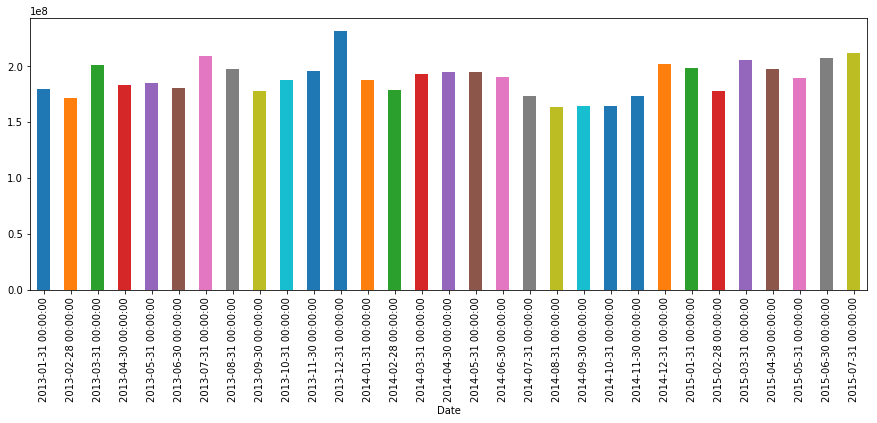

In [9]:
ts_df['Sales'].resample('1M').sum().plot(kind='bar');
# Alternaive:
#merged_df[['Date','Sales']].groupby(['Date'])['Sales'].sum().resample('1M').sum().plot.bar();

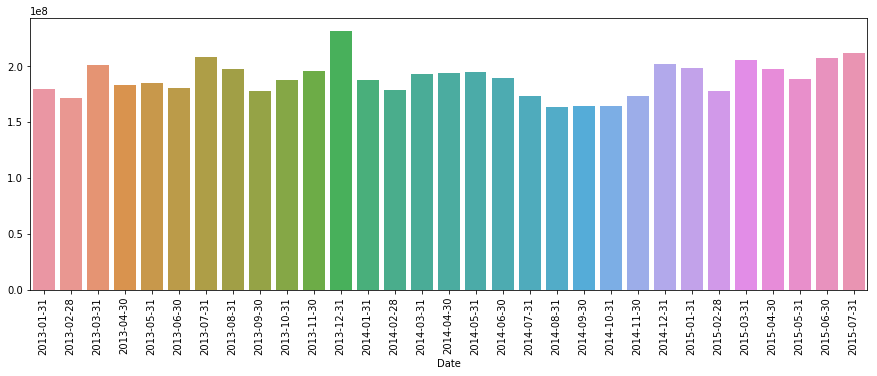

In [10]:
spm = ts_df['Sales'].resample('1M').sum()
ax = sns.barplot(x=spm.index, y=spm.values)
ax.set_xticklabels(spm.index.strftime('%Y-%m-%d'), rotation=90);

### Sales per quarter

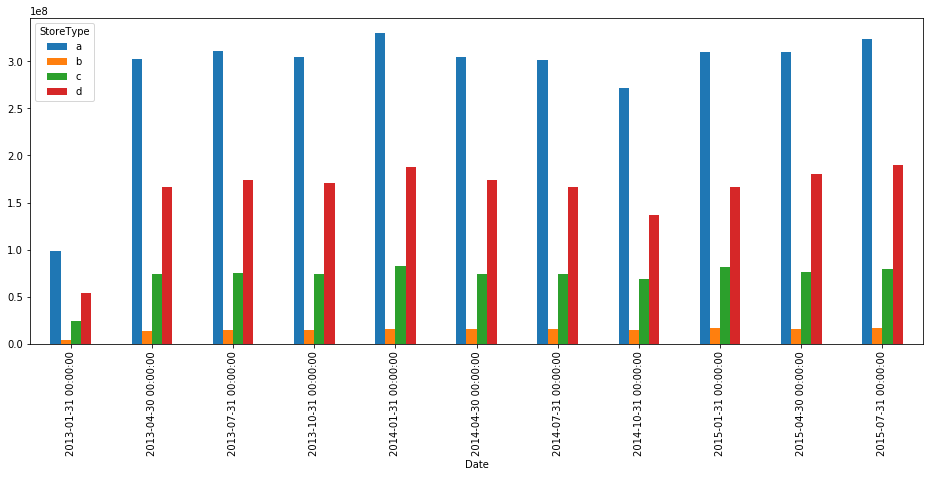

In [36]:
ts_df[['StoreType','Sales']].groupby('StoreType').resample('3M')['Sales'].sum().unstack('StoreType').plot.bar();
# alternative:
#merged_df[['Date','StoreType','Sales']].groupby(['Date', 'StoreType'])['Sales'].sum().unstack().resample('3M').sum().plot.bar();